In [2]:
import nltk
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

**By Matthew Lucich**

### 1) Choose a corpus of interest.

Choose the John Maynard Keynes book *The Economic Consequences of the Peace* to act as my corpus of text, since I interested in economics and the book is in the public domain (I have yet to read it though).

In [3]:
r = requests.get('https://www.gutenberg.org/cache/epub/15776/pg15776.txt')

Skipping the first 1,115 characters since it is not text apart of the book. 

In [4]:
economic_corpus = r.text[1115:]

Tokenizing the data and only selecting alpha numeric tokens (removing punctuation).

In [6]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(economic_corpus)

### 2) How many total unique words are in the corpus?

First, count of total words is:

In [7]:
len(words)

74780

Total **unique** words is:

In [8]:
len(set(words))

7582

### 3) Taking the most common words, how many unique words represent half of the total words in the corpus?

In [9]:
half_words = len(words) / 2
print(round(half_words))

37390


Creating a frequency distribution of the words in the text.

In [10]:
words_freq_dist = nltk.FreqDist(w.lower() for w in words)

In [11]:
def half_total_words(word_dist, half_words):
    """ Calculate the number of unique words that represent half of total words
    word_dist: top unique word distribution descending (counter)
    half_words: number that signifies count of half of the total words in a corpus"""
    word_count = []
    i = 1
    for word, freq in word_dist.most_common():
        if sum(word_count) >= half_words:
            print(f"The most frequent {i} words represent half of the total words in the corpus.")
            break
        word_count.append(freq)
        i+=1

In [12]:
half_total_words(words_freq_dist, half_words)

The most frequent 77 words represent half of the total words in the corpus.


### 4) Identify the 200 highest frequency words in this corpus.

Including stopwords

In [13]:
words_freq_dist.most_common()[:200]

[('the', 6008),
 ('of', 4136),
 ('to', 2276),
 ('and', 2133),
 ('in', 1618),
 ('a', 1183),
 ('is', 827),
 ('000', 792),
 ('be', 744),
 ('for', 739),
 ('as', 650),
 ('that', 642),
 ('which', 614),
 ('by', 584),
 ('it', 567),
 ('not', 544),
 ('germany', 511),
 ('on', 476),
 ('this', 475),
 ('or', 458),
 ('was', 421),
 ('but', 391),
 ('from', 389),
 ('with', 384),
 ('are', 374),
 ('at', 367),
 ('her', 328),
 ('have', 296),
 ('an', 293),
 ('their', 280),
 ('will', 279),
 ('all', 268),
 ('german', 245),
 ('any', 230),
 ('s', 228),
 ('war', 225),
 ('if', 219),
 ('would', 219),
 ('they', 211),
 ('no', 198),
 ('were', 198),
 ('i', 197),
 ('has', 193),
 ('may', 187),
 ('had', 186),
 ('he', 185),
 ('we', 184),
 ('so', 184),
 ('been', 184),
 ('these', 183),
 ('his', 183),
 ('other', 177),
 ('1', 176),
 ('treaty', 174),
 ('its', 170),
 ('one', 166),
 ('there', 166),
 ('europe', 157),
 ('france', 156),
 ('allies', 156),
 ('can', 152),
 ('than', 147),
 ('more', 144),
 ('such', 142),
 ('reparation', 

### 5) Create a graph that shows the relative frequency of these 200 words.

Store the top 200 words and their frequencies in lists.

In [14]:
top_words = [word[0] for word in words_freq_dist.most_common()[:200]]
top_freq = [word[1] for word in words_freq_dist.most_common()[:200]]

<BarContainer object of 200 artists>

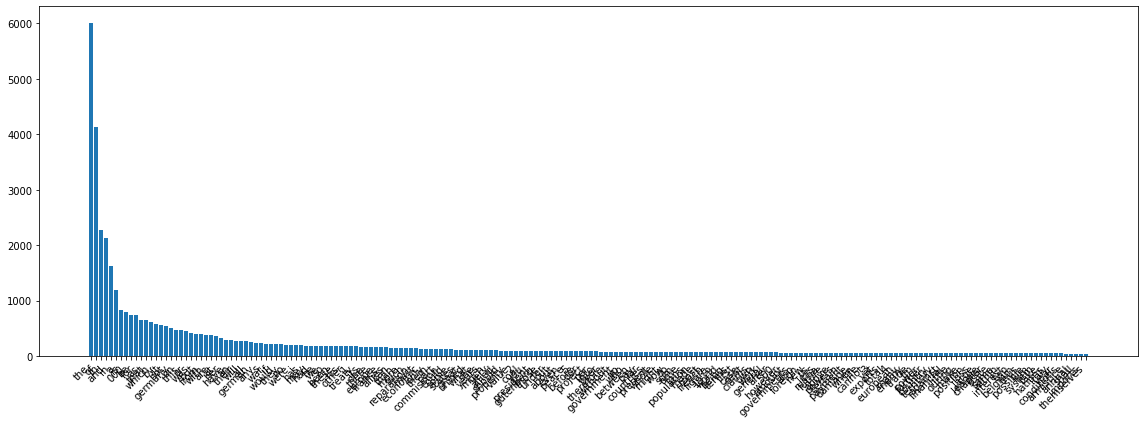

In [15]:
figure(figsize=(16, 6), tight_layout=True)
plt.xticks(rotation=45, ha='right')
plt.bar(top_words, top_freq)

### 6) Does the observed relative frequency of these words follow Zipf’s law? Explain.

There appears to be various definitions of Zipf's law, however, a consistent theme among the interpretations is that many phenomena exhibit special power-law distributions. Zipf's law is often specified as $ f(r) \alpha \frac{1}{r^\alpha} $, where $r$ is the frequency rank of a word and $f(r)$ is its frequency in a natural corpus. Based on comparing the frequency distribution plot above with the plots in this [article](https://medium.com/@devalshah1619/a-mysterious-law-so-simple-and-yet-so-universal-aa9f1c8903d1) and my general understanding of power law distributions, it does appear that the frequecy of the most common words in *The Economic Consequences of the Peace* approximately follow Zipf's law.

### 7) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Based on the word frequency plots I have reviewed for other corpora, the word frequency distribution of *The Economic Consequences of the Peace* does not appear to be noticeably different than other texts. This is not too surprising as the book makes for a large corpus which may have an impact on how closely frequency distributions follow Zipf's law.